# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

## Bullish Marubozu

In the previous video units, we saw the conditions for the formation of a Bullish Marubozu. We also saw why the bullish marubozu candle signifies extreme bullishness in the market.

![title](https://d2a032ejo53cab.cloudfront.net/Course/Units/Mcq/UnitContent/3UdiJ39Z/bullishmaru.png)

This is how a bullish marubozu looks like. It has no shadow or a very small shadow.

In this notebook, we will generate signals for marubozu pattern and visualise the bullish marubozu pattern.

The notebook is structured as follows:
1. [Import the Data](#import)
2. [Plot Candlestick Chart](#plot)
3. [Identify Marubozu](#identify)
4. [Plot Bullish Marubozu Pattern](#plotpattern)

## Import Libraries

In [2]:
# For data manipulation
import pandas as pd
import numpy as np

# For technical indicators
import talib as ta

# For plotting
import mplfinance as mpf

<a id='import'></a>
## Import the Data

Import the file `AAPL_daily_2017_2022.csv` using the `read_csv` method of `pandas`. This file has the daily OHLC values for Apple stock. 
This CSV file is available in the zip file of the unit 'Python Codes and Data' in the 'Course Summary' section.

In [3]:
# Import price data of Apple stock
data = pd.read_csv('../data_modules/AAPL_daily_2017_2022.csv', index_col=0)

# Change index to datetime
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')

# Display the data
data.tail()

,Open,High,Low,Close
Date,,,,
2022-09-12,159.589996,164.259995,159.300003,163.429993
2022-09-13,159.899994,160.539993,153.369995,153.839996
2022-09-14,154.789993,157.100006,153.610001,155.309998
2022-09-15,154.649994,155.240005,151.380005,152.369995
2022-09-16,151.210007,151.350006,148.369995,150.699997


<a id='plot'></a>
## Plot Candlestick Chart

We will use the `plot` method from `mplfinance` library for plotting candlestick chart. To prevent clutter on the chart due to excessive datapoints we have used only the last 50 rows of the dataframe which is passed using `data.tail(50)`. The `style` parameter of `plot` function provides the functionality to choose different styles for plotting the pattern. You can refer to  <a href='https://github.com/matplotlib/mplfinance/blob/master/examples/styles.ipynb' target="_blank">this</a> link to know about the same.

We have set the `volume` parameter as `False` as we will only use OHLC values for plotting the candlestick chart.

The x-axis is the `Date` and the y-axis is the `Price` of the stock.

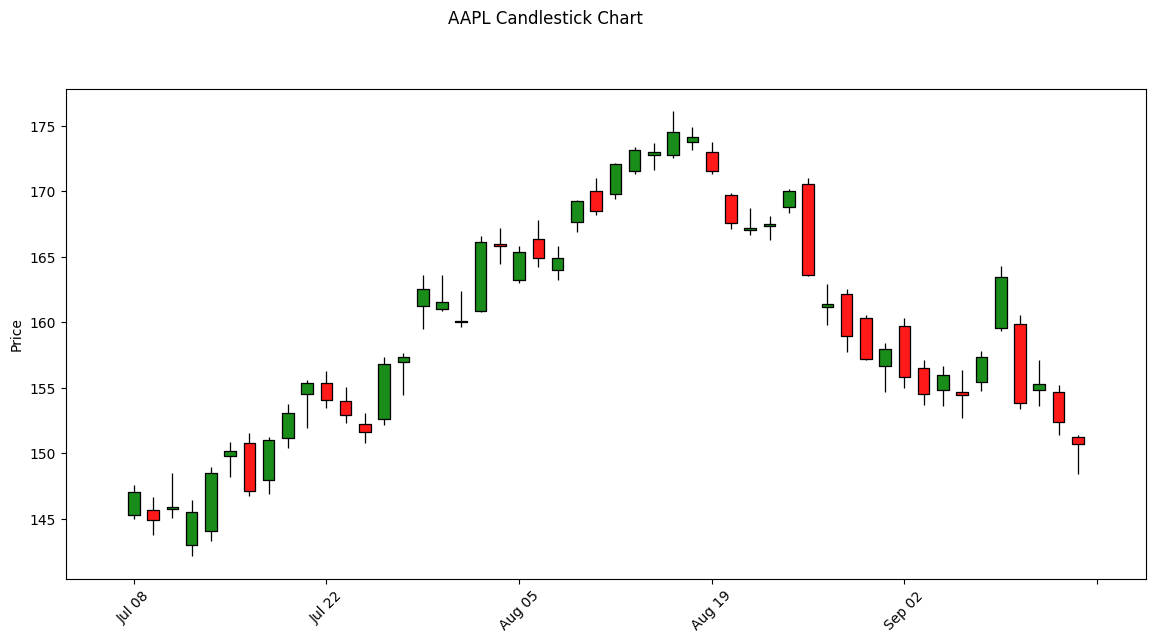

In [3]:
# Plot candlestick chart
mpf.plot(data.tail(50),type='candle', style=mpf.make_mpf_style(marketcolors=mpf.make_marketcolors(up='g',down='r')), volume=False, title='AAPL Candlestick Chart', figsize=(15, 7))

<a id='identify'></a>
## Identify Marubozu

We will identify the Marubozu pattern. For the pattern identification we will use the `talib` library function `CDLMARUBOZU`.

Syntax:
```python
ta.CDLMARUBOZU(data['Open'], data['High'], data['Low'], data['Close'])
```
This function takes `Open`, `High`, `Low` and `Close` values as input and returns an integer value as output. 

An integer value of `100` is returned if there is a bullish marubozu formation. The function returns `-100` in the case of a Bearish Marubozu, and `0` is returned if no pattern is formed.

In [4]:
# Generate signal for Marubozu
data['pattern_signal'] = ta.CDLMARUBOZU(data['Open'], data['High'], data['Low'], data['Close'])

<a id='plotpattern'></a>
## Plot Bullish Marubozu Pattern

We will plot the bullish marubozu pattern on the candlestick chart.

<img align="left" width="30" height="30" src="https://d2a032ejo53cab.cloudfront.net/Course/Units/Mcq/UnitContent/dMbD1sub/blackmarker.png"> --  To easily identify the bullish marubozu pattern we will use this black marker which will basically indicate a bullish marubozu formation.  

We will store the marker position in an array `marubozu_marker` and plot the marker at a height of `0.1%` above the `High` price so that it is clearly visible on the chart. We will take only the last `50` values for plotting so as to avoid clutter on the chart.

We have used the `make_addplot` function from the `mplfinance` library to plot the marubozu pattern. You can know more about the `make_addplot` function <a href='https://github.com/matplotlib/mplfinance/blob/master/examples/addplot.ipynb' target="_blank">here</a>.

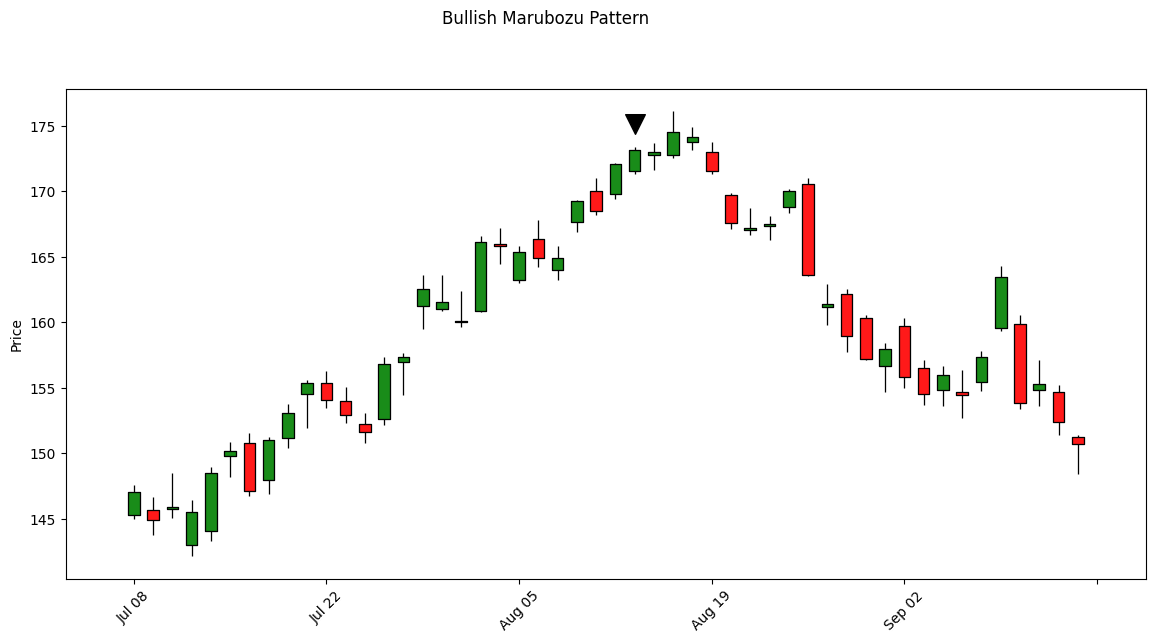

In [5]:
# Set pattern occurrence positions
marubozu_marker = np.where(data.tail(50).pattern_signal == 100, (1.01 * data.tail(50).High), np.nan)

# Plot Marubozu pattern
marubozu_plot = mpf.make_addplot(marubozu_marker, type='scatter', marker='v', markersize=200, panel=0, color="black")
mpf.plot(data.tail(50), type='candle', style=mpf.make_mpf_style(marketcolors=mpf.make_marketcolors(up='g',down='r')), addplot=marubozu_plot, title='Bullish Marubozu Pattern', figsize=(15, 7))

## Conclusion and Next Steps

In this notebook, we saw how we can generate signals for marubozu patterns and plot the bullish marubozu pattern on a candlestick chart. In the upcoming units, we will create a trading strategy to trade bullish marubozu pattern and backtest it.<br><br> 